In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../summary.tsv", sep="\t")
df.head()

,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len,Q1,Q2,Q3,sum_gap,N50,N50_num,Q20(%),Q30(%),AvgQual,GC(%),sum_n
0,GOMC.bin.10027,FASTA,DNA,590,5007018,1500,8486.5,79977,2431,4684,10820,0,15272,98,0,0,0.0,65.97,0
1,GOMC.bin.10037,FASTA,DNA,881,6342371,1501,7199.1,51156,3033,5081,9242,0,10127,193,0,0,0.0,46.56,0
2,GOMC.bin.10082,FASTA,DNA,495,3581699,1506,7235.8,39465,2692,5238,9700,0,10560,107,0,0,0.0,40.17,0
3,GOMC.bin.10102,FASTA,DNA,151,4160111,1520,27550.4,386529,2336,10192,35888,0,65890,18,0,0,0.0,30.90,0
4,GOMC.bin.10144,FASTA,DNA,519,3872192,1500,7460.9,42010,2847,4944,9893,0,11625,104,0,0,0.0,67.14,0


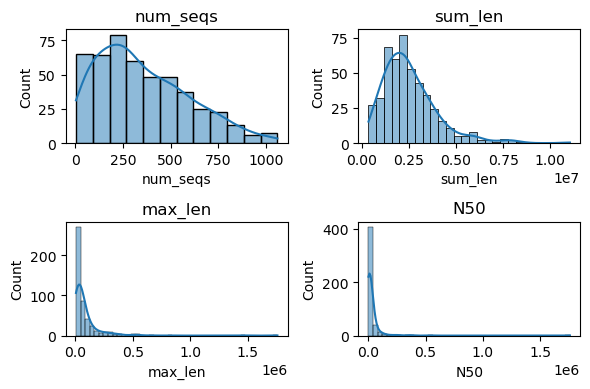

In [3]:
cols = ["num_seqs", "sum_len", "max_len", "N50"]

plt.figure(figsize=(6,4))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [4]:
pd.set_option('display.float_format', '{:.0f}'.format)

for col in cols:
    print(df[col].describe())

count    475
mean     357
std      240
min        4
25%      164
50%      301
75%      520
max     1060
Name: num_seqs, dtype: float64
count        475
mean     2531672
std      1447730
min       351229
25%      1549400
50%      2265087
75%      3193784
max     11042267
Name: sum_len, dtype: float64
count       475
mean      83468
std      141667
min        6968
25%       21864
50%       38466
75%       87382
max     1757649
Name: max_len, dtype: float64
count       475
mean      28542
std       93534
min        1840
25%        4928
50%        8919
75%       22314
max     1757649
Name: N50, dtype: float64


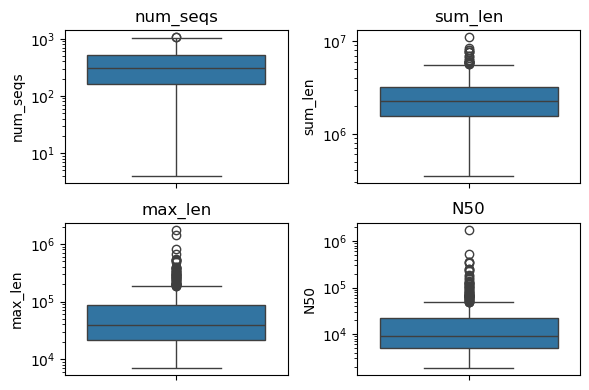

In [5]:
plt.figure(figsize=(6, 4))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.yscale('log')
    plt.title(col)

plt.tight_layout()
plt.show()

In [6]:
num_seq = df["num_seqs"]

q1 = num_seq.quantile(0.25)
q3 = num_seq.quantile(0.75)
iqr = q3 - q1
supl = q3 + 1.5 * iqr

df_iqr = df[num_seq <= supl]
df_iqr["num_seqs"].describe()

count    473
mean     354
std      236
min        4
25%      161
50%      299
75%      516
max     1034
Name: num_seqs, dtype: float64

In [7]:
df_iqr.to_csv('../summary_iqr.csv', index=False)